<a href="https://colab.research.google.com/github/sanketchavan5595/Students-performance-analysis/blob/main/Student_Performances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

aim: To understand the influence of the parents background, test preparation etc on students performance


In [2]:
file_path = 'https://raw.githubusercontent.com/sanketchavan5595/Students-performance-analysis/main/StudentsPerformance.csv'
df = pd.read_csv(file_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Variable identification 

* **Categorical variables**
    * gender
    * race/ethnicity
    * parental level of education
    * lunch
  
* **Numerical variables**
    * math score
    * reading score
    * writing score

## Numerical variables

### Let's identify the relationship between the scores

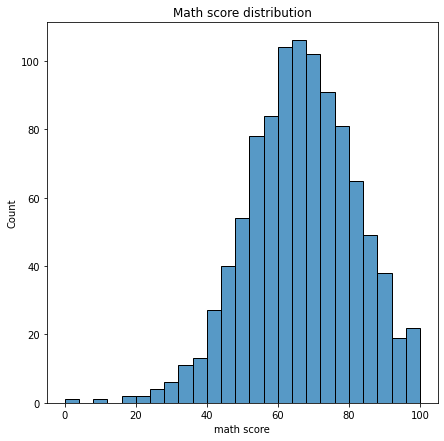

In [40]:
plt.figure(figsize= (7,7))

plt.title('Math score distribution')
sns.histplot(df['math score']);

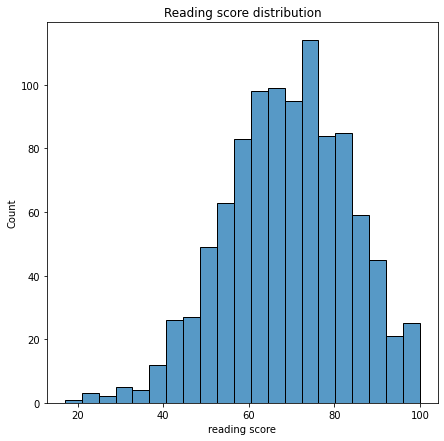

In [42]:
plt.figure(figsize= (7,7))

plt.title('Reading score distribution')
sns.histplot(df['reading score']);

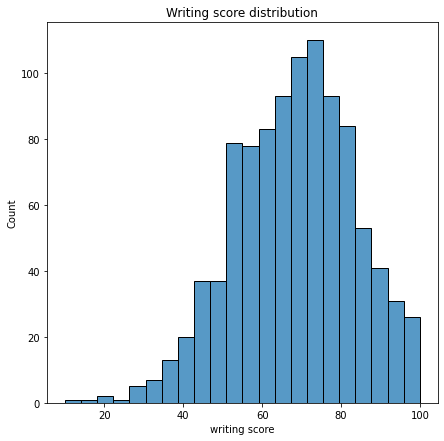

In [43]:
plt.figure(figsize= (7,7))

plt.title('Writing score distribution')
sns.histplot(df['writing score']);

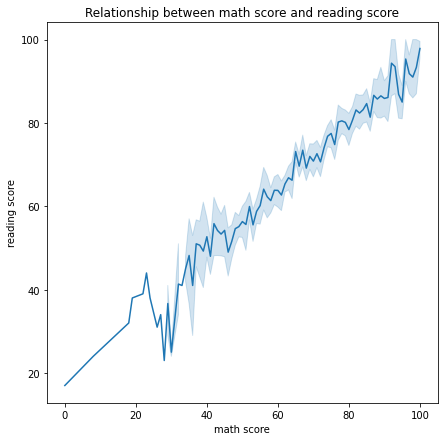

In [6]:
plt.figure(figsize= (7,7))
plt.title("Relationship between math score and reading score")
sns.lineplot(x = 'math score', 
             y = 'reading score',
             data = df);

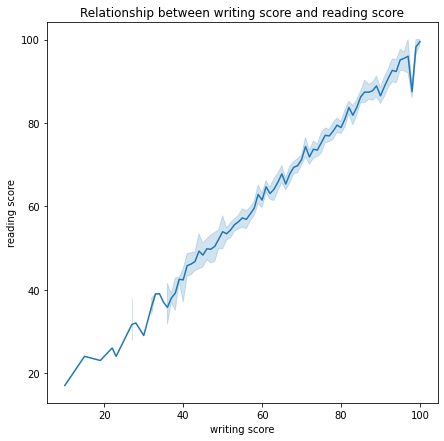

In [7]:
plt.figure(figsize= (7,7))
plt.title("Relationship between writing score and reading score")
sns.lineplot(x = 'writing score', 
             y = 'reading score',
             data = df);

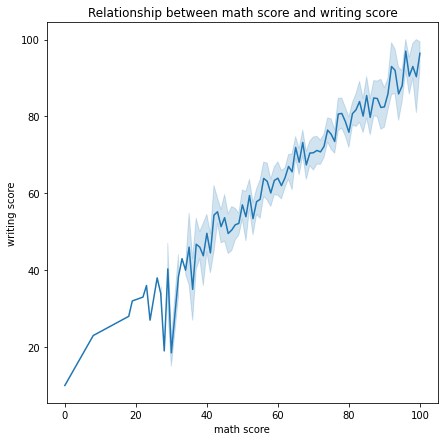

In [8]:
plt.figure(figsize= (7,7))
plt.title("Relationship between math score and writing score")
sns.lineplot(x = 'math score', 
             y = 'writing score',
             data = df);

**All the graphs above indicate that scores follow a linear relationship with each other**

***let's add the column of average score in the dataset. We will be using that column to identify its relationship with other categorical variables***

In [9]:
df['average score'] = (df['math score'] + df['writing score'] + df['reading score']) / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


## --

## Categorical variables

 * gender
 * race/ethnicity
 * parental level of education
 * lunch
 * test preparation course


### gender

In [10]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

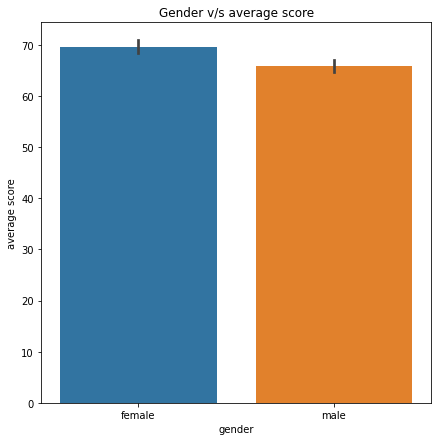

In [11]:
plt.figure(figsize= (7,7))
plt.title('Gender v/s average score')
sns.barplot(x = 'gender', 
            y = 'average score',
            data = df);

**Female gender has higher average score than Male gender**

### race/ethnicity

In [12]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

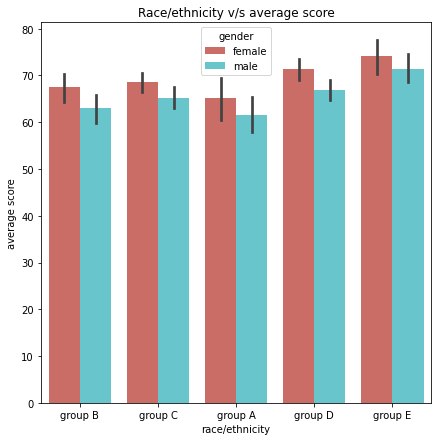

In [13]:
plt.figure(figsize= (7,7))

plt.title('Race/ethnicity v/s average score')
sns.barplot(x = 'race/ethnicity', 
            y = 'average score', 
            hue = 'gender',
            palette = 'hls',
            data = df);

**Student of Group A have the lowest average scores and the students of Group E have the highest**

### Parental level of education

In [14]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

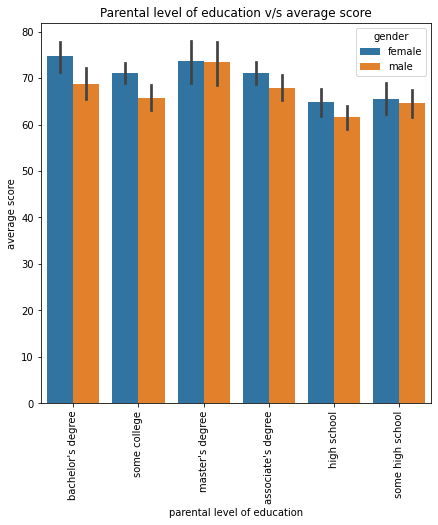

In [15]:
plt.figure(figsize= (7,7))
plt.title('Parental level of education v/s average score')
plt.xticks(rotation = 90)
sns.barplot(x = 'parental level of education', 
            y = 'average score', 
            data = df,
            hue = 'gender',
            palette = 'tab10');

**Student who have highly educated parents have higher average score** 

### lunch

* Students in the United States whose household income is less than 130% of the poverty line qualify for free lunch, and students whose household income is between 130% and 185% of the poverty line qualify for reduced-price lunch.
* Free or reduced lunch status is used to major socio-economic disadvantage

In [16]:
df.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

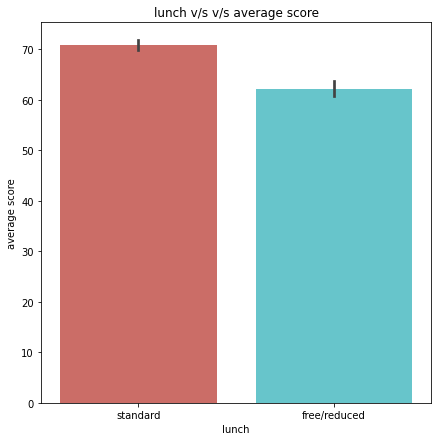

In [17]:
plt.figure(figsize= (7,7))
plt.title('lunch v/s v/s average score')
sns.barplot(x = 'lunch', 
            y = 'average score', 
            data = df, 
            palette = 'hls');

### test preparation course

In [18]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

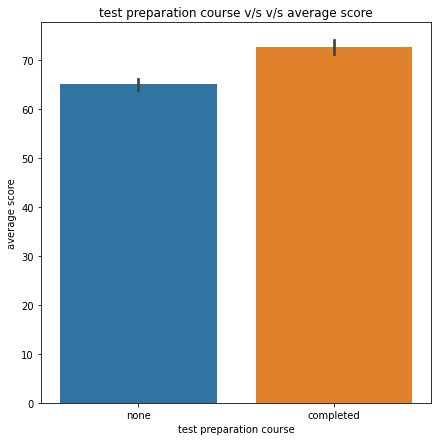

In [19]:
plt.figure(figsize= (7,7))

plt.title('test preparation course v/s v/s average score')

sns.barplot(x = 'test preparation course', 
            y = 'average score', 
            data = df);

**Students who have completed the test preparation course have higher marks than the ones who did not**

# Deriving the insights

In [20]:
df1 = df.groupby(['gender','parental level of education'])[['reading score', 'math score', 'writing score']].mean()
df1

reading score  math score  writing score
gender parental level of education                                          
female associate's degree               74.120690   65.250000      74.000000
       bachelor's degree                77.285714   68.349206      78.380952
       high school                      68.202128   59.351064      66.691489
       master's degree                  76.805556   66.500000      77.638889
       some college                     73.550847   65.406780      74.050847
       some high school                 69.109890   59.296703      68.285714
male   associate's degree               67.433962   70.764151      65.405660
       bachelor's degree                68.090909   70.581818      67.654545
       high school                      61.480392   64.705882      58.539216
       master's degree                  73.130435   74.826087      72.608696
       some college                     64.990741   69.009259      63.148148
       some high school                 64.693182   67.840909      61.375000

**Among students with same parental level of education, female students have higher average reading and writing scores than their male counterparts. Where male students have higher average math scores**

In [21]:
df1 = df.groupby(['parental level of education','test preparation course'])[['reading score', 'math score', 'writing score']].mean()
df1.sort_values('writing score', ascending = False)

,,reading score,math score,writing score
parental level of education,test preparation course,,,
master's degree,completed,78.250000,70.600000,80.100000
bachelor's degree,completed,76.739130,73.282609,78.695652
associate's degree,completed,76.170732,71.829268,76.817073
some college,completed,75.987013,71.454545,76.519481
master's degree,none,73.897436,69.307692,73.410256
some high school,completed,70.948052,66.701299,70.363636
bachelor's degree,none,70.611111,66.902778,69.986111
high school,completed,67.839286,65.000000,68.053571
associate's degree,none,67.857143,65.571429,65.842857


* **Students who have completed the test preparation course and with bachelor's degree as the parental level of education have higher average math scores**
* **Students who have completed the test preparation course and with master's degree as the parental level of education have higher average reading scores**
* **Students who have completed the test preparation course and with master's degree as the parental level of education have higher average writing scores**

In [22]:
df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].max()

,math score,reading score,writing score
parental level of education,,,
associate's degree,100,100,100
bachelor's degree,100,100,100
high school,99,99,100
master's degree,95,100,100
some college,100,100,99
some high school,97,100,100


In [23]:
df[df['average score'] == 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
458,female,group E,bachelor's degree,standard,none,100,100,100,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,100.0
962,female,group E,associate's degree,standard,none,100,100,100,100.0


* **Only three students (1 male and 2 female) have scored full marks in every subject. They all belong group E of race/ethnicity** 
* **Out of those three students, only one (male) has completed the test preparation course**

### let's take a look at the students who have scored more than 90 on average

In [36]:
average_score_df = df[df['average score'] >= 90][df.columns]
average_score_df.head()

# uncomment the following code to get the value counts of each categorical column

# columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']
# for col in columns:
#     print(col)
#     print(average_score_df[col].value_counts())
#     print('\n')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
2,female,group B,master's degree,standard,none,90,95,93,92.666667
6,female,group B,some college,standard,completed,88,95,92,91.666667
104,male,group C,some college,standard,completed,98,86,90,91.333333
106,female,group D,master's degree,standard,none,87,100,100,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,99.666667


***52 Students have scored 90 or more average marks***

**Here are some interesting results from the above dataset**
* 73 percent are female students
* 78 percent of the students belong to group C, E, and D
* Around 77 percent of the students have "associate's degree, bachelor's degree or some college" as the parental level of education
* 67.30 (35 students) have completed the test preparation course
* Only 4 student with socio-economic disadvantage have managed to score more than 90 average marks

### Let's find out how the parental level of education affects the students' performance
**We will consider two extreme cases**
* high school 
* master's degree

In [26]:
high_school_df = df[df['parental level of education'] == 'high school'][df.columns]
masters_degree_df = df[df['parental level of education'] == "master's degree"][df.columns]

In [27]:
# Score columns
score_cols = ['math score', 'reading score', 'writing score']

# categorical columns
cat_cols = ['gender', 'race/ethnicity','lunch','test preparation course']


# Let's define some functions to know the data better 
# these will be used for both high_school_df and masters_degree_df

# function to get the basic statistics
def stat(df):
    for col in score_cols:
        print(col.upper())
        print('Mean: ' + str(df[col].mean()))
        print('Median: ' + str(df[col].median()))
        print('Maximum score: '+ str(df[col].max()))
        print('Minimum score: '+ str(df[col].min()))
        print('--------------------')
        
# function to get the value counts 
def value_counts(df):
    for col in cat_cols:
        print(col.upper())
        print(df[col].value_counts())
        print('-------------------')

In [28]:
print('Parental level of education: High School')
stat(high_school_df)
print('*****************************')
print("Parental level of education: Master's degree")
stat(masters_degree_df)

Parental level of education: High School
MATH SCORE
Mean: 62.13775510204081
Median: 63.0
Maximum score: 99
Minimum score: 8
--------------------
READING SCORE
Mean: 64.70408163265306
Median: 66.0
Maximum score: 99
Minimum score: 24
--------------------
WRITING SCORE
Mean: 62.44897959183673
Median: 64.0
Maximum score: 100
Minimum score: 15
--------------------
*****************************
Parental level of education: Master's degree
MATH SCORE
Mean: 69.7457627118644
Median: 73.0
Maximum score: 95
Minimum score: 40
--------------------
READING SCORE
Mean: 75.37288135593221
Median: 76.0
Maximum score: 100
Minimum score: 42
--------------------
WRITING SCORE
Mean: 75.67796610169492
Median: 75.0
Maximum score: 100
Minimum score: 46
--------------------


* **The maximum score across all the subjects in both the categories is nearly same.**
* **The minimum score however is very less among the students with parental level of education as high school**
* **The mean and the median score is higher among the students with parental level of education as master's degree**

In [29]:
print('Parental level of education: High School')
value_counts(high_school_df)
print('*****************************')
print("Parental level of education: Master's degree")
value_counts(masters_degree_df)

Parental level of education: High School
GENDER
male      102
female     94
Name: gender, dtype: int64
-------------------
RACE/ETHNICITY
group C    64
group B    48
group D    44
group E    22
group A    18
Name: race/ethnicity, dtype: int64
-------------------
LUNCH
standard        126
free/reduced     70
Name: lunch, dtype: int64
-------------------
TEST PREPARATION COURSE
none         140
completed     56
Name: test preparation course, dtype: int64
-------------------
*****************************
Parental level of education: Master's degree
GENDER
female    36
male      23
Name: gender, dtype: int64
-------------------
RACE/ETHNICITY
group D    23
group C    19
group E     8
group B     6
group A     3
Name: race/ethnicity, dtype: int64
-------------------
LUNCH
standard        35
free/reduced    24
Name: lunch, dtype: int64
-------------------
TEST PREPARATION COURSE
none         39
completed    20
Name: test preparation course, dtype: int64
-------------------


* **For high school level of parental education, 35.71% are at socio-economic disadvantage. While for master's degreee level of parental education 40.67% are at socio-economic disadvantage**
* **For high school level of parental education, only 28.57% students have completed the test preparation course, but in case of master's degree level of parental education, 33.89% students have completed the test preparation course**

##References
* https://pandas.pydata.org/docs/
* https://numpy.org/doc/
* https://matplotlib.org/stable/contents.html
* https://seaborn.pydata.org/
